In [1]:
import tensorflow as tf
import pandas as pd
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
df = pd.read_csv('indonesian-names.csv')


In [2]:
df.head()

,name,gender
0,hafizhan shidqi,m
1,gandhi wibowo,m
2,aldio mahendra purwandrarto,m
3,benny putra,m
4,vicky vernando dasta,m


In [3]:
category = pd.get_dummies(df.gender)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='gender')
df_baru

,name,f,m
0,hafizhan shidqi,0,1
1,gandhi wibowo,0,1
2,aldio mahendra purwandrarto,0,1
3,benny putra,0,1
4,vicky vernando dasta,0,1
...,...,...,...
1955,hadimah,1,0
1956,aprillia rahma wati,1,0
1957,muhamad khoirunisa. m,0,1
1958,sukandi,0,1


In [4]:
name = df_baru['name'].values
label = df_baru[['f', 'm']].values

In [5]:
# pembagian untuk train dam data testing
from sklearn.model_selection import train_test_split
name_latih, name_test, label_latih, label_test = train_test_split(name, label, test_size=0.2)

In [6]:
# tokenisasi
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=1000, oov_token='x')
tokenizer.fit_on_texts(name_latih) 
tokenizer.fit_on_texts(name_test)
 
sekuens_latih = tokenizer.texts_to_sequences(name_latih)
sekuens_test = tokenizer.texts_to_sequences(name_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          80000     
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 117,442
Trainable params: 117,442
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\n Accuracy telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [10]:
history = model.fit(padded_latih, label_latih, epochs=50, 
                   validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
49/49 - 3s - loss: 0.6866 - accuracy: 0.5536 - val_loss: 0.6736 - val_accuracy: 0.5740 - 3s/epoch - 66ms/step
Epoch 2/50
49/49 - 0s - loss: 0.5822 - accuracy: 0.6754 - val_loss: 0.4312 - val_accuracy: 0.7985 - 480ms/epoch - 10ms/step
Epoch 3/50
49/49 - 0s - loss: 0.3128 - accuracy: 0.8520 - val_loss: 0.3577 - val_accuracy: 0.8240 - 432ms/epoch - 9ms/step
Epoch 4/50
49/49 - 0s - loss: 0.2294 - accuracy: 0.8788 - val_loss: 0.3609 - val_accuracy: 0.7526 - 399ms/epoch - 8ms/step
Epoch 5/50
49/49 - 0s - loss: 0.2063 - accuracy: 0.8750 - val_loss: 0.3582 - val_accuracy: 0.8214 - 455ms/epoch - 9ms/step
Epoch 6/50
49/49 - 0s - loss: 0.1947 - accuracy: 0.8846 - val_loss: 0.3619 - val_accuracy: 0.8291 - 452ms/epoch - 9ms/step
Epoch 7/50
49/49 - 0s - loss: 0.1927 - accuracy: 0.8744 - val_loss: 0.3889 - val_accuracy: 0.8163 - 490ms/epoch - 10ms/step
Epoch 8/50
49/49 - 0s - loss: 0.1980 - accuracy: 0.8839 - val_loss: 0.3749 - val_accuracy: 0.8189 - 454ms/epoch - 9ms/step
Epoch 9/50
49/49

<function matplotlib.pyplot.show(*args, **kw)>

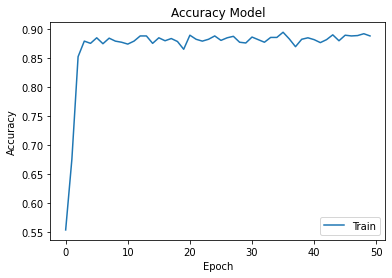

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Accuracy dan Validation Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

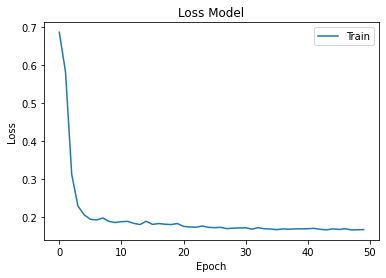

In [12]:
plt.plot(history.history['loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show